In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Importer les bibliothèques nécessaires

In [ ]:
# Importation des bibliothèques nécessaires
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Bibliothèques pour le prétraitement des données
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

# Bibliothèques pour l'entraînement des modèles
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [ ]:
# Remplace par le chemin de ton fichier
file_path = '/content/drive/MyDrive/Prédiction_Blessures/data_tabulaire/muscle_injury_data_refined_10000.csv'
data = pd.read_csv(file_path)

# Affiche les premières lignes pour vérifier
print(data.head())

   Minutes jouées  Fatigue (%)  Heures d’entraînement Contact physique  Âge  \
0            2007        51.72                     25     Sans contact   26   
1             868        74.17                     17     Sans contact   33   
2            1021        51.00                     22     Sans contact   23   
3            2045        65.18                     19     Sans contact   25   
4            1467        67.51                     20     Avec contact   32   

   Historique de blessures musculaires  Blessure musculaire  
0                                    1                    0  
1                                    1                    1  
2                                    0                    0  
3                                    0                    0  
4                                    0                    0  


3. Prétraitement des données


In [ ]:
# Vérifier les valeurs manquantes
data.isnull().sum()

# Supprimer les lignes avec des valeurs manquantes si nécessaire
data.dropna(inplace=True)

# Encodage des variables catégoriques
data = pd.get_dummies(data, drop_first=True)  # Convertir les variables catégoriques en variables binaires

# Séparer les features (X) et le label (y)
X = data.drop(columns=['Blessure musculaire'])  # Caractéristique (toutes sauf la colonne 'Blessure musculaire')
y = data['Blessure musculaire']  # Label (la colonne 'Blessure musculaire')
print(data.head())
# Vérifie la distribution des données
print(data['Blessure musculaire'].value_counts())

   Minutes jouées  Fatigue (%)  Heures d’entraînement  Âge  \
0            2007        51.72                     25   26   
1             868        74.17                     17   33   
2            1021        51.00                     22   23   
3            2045        65.18                     19   25   
4            1467        67.51                     20   32   

   Historique de blessures musculaires  Blessure musculaire  \
0                                    1                    0   
1                                    1                    1   
2                                    0                    0   
3                                    0                    0   
4                                    0                    0   

   Contact physique_Sans contact  
0                           True  
1                           True  
2                           True  
3                           True  
4                          False  
Blessure musculaire
0    7232
1    276

4. Séparer les données en train/test

In [ ]:
# Séparer les données en ensembles d'entraînement (80%) et de test (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


5. Équilibrer les données

In [ ]:
# Fusionner X_train et y_train pour utiliser la fonction resample
train_data = pd.concat([X_train, y_train], axis=1)

# Séparer les classes minoritaires et majoritaires
majority_class = train_data[train_data['Blessure musculaire'] == 0]
minority_class = train_data[train_data['Blessure musculaire'] == 1]

# Sur-échantillonner la classe minoritaire
minority_upsampled = resample(minority_class,
                              replace=True,
                              n_samples=len(majority_class),
                              random_state=42)

# Combiner les classes majoritaire et minoritaire
train_data_balanced = pd.concat([majority_class, minority_upsampled])

# Séparer les features et le label
X_train_balanced = train_data_balanced.drop(columns=['Blessure musculaire'])
y_train_balanced = train_data_balanced['Blessure musculaire']

# Vérifie la distribution des données
print(train_data_balanced['Blessure musculaire'].value_counts())

Blessure musculaire
0    5781
1    5781
Name: count, dtype: int64


6. Entraîner les modèles

In [ ]:
# Entraîner un modèle Random Forest
model_rf = RandomForestClassifier(random_state=42)
model_rf.fit(X_train_balanced, y_train_balanced)

# Entraîner un modèle de régression logistique
model_lr = LogisticRegression(random_state=42)
model_lr.fit(X_train_balanced, y_train_balanced)

# Entraîner un modèle SVM
model_svc = SVC(random_state=42)
model_svc.fit(X_train_balanced, y_train_balanced)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


SVC(random_state=42)

7. Évaluer le modèle

In [ ]:
# Prédictions sur l'ensemble de test
y_pred_rf = model_rf.predict(X_test)
y_pred_lr = model_lr.predict(X_test)
y_pred_svc = model_svc.predict(X_test)

# Évaluation du modèle Random Forest
print("Random Forest Evaluation")
print(classification_report(y_test, y_pred_rf))
print("Accuracy: ", accuracy_score(y_test, y_pred_rf))
print(confusion_matrix(y_test, y_pred_rf))

# Évaluation du modèle Régression Logistique
print("Logistic Regression Evaluation")
print(classification_report(y_test, y_pred_lr))
print("Accuracy: ", accuracy_score(y_test, y_pred_lr))
print(confusion_matrix(y_test, y_pred_lr))

# Évaluation du modèle SVM
print("SVM Evaluation")
print(classification_report(y_test, y_pred_svc))
print("Accuracy: ", accuracy_score(y_test, y_pred_svc))
print(confusion_matrix(y_test, y_pred_svc))


Random Forest Evaluation
              precision    recall  f1-score   support

           0       0.76      0.88      0.81      1451
           1       0.45      0.27      0.33       549

    accuracy                           0.71      2000
   macro avg       0.60      0.57      0.57      2000
weighted avg       0.67      0.71      0.68      2000

Accuracy:  0.7085
[[1271  180]
 [ 403  146]]
Logistic Regression Evaluation
              precision    recall  f1-score   support

           0       0.81      0.61      0.70      1451
           1       0.38      0.63      0.47       549

    accuracy                           0.62      2000
   macro avg       0.60      0.62      0.59      2000
weighted avg       0.69      0.62      0.64      2000

Accuracy:  0.617
[[888 563]
 [203 346]]
SVM Evaluation
              precision    recall  f1-score   support

           0       0.76      0.56      0.64      1451
           1       0.31      0.53      0.39       549

    accuracy              

8. Comparaison des modèles

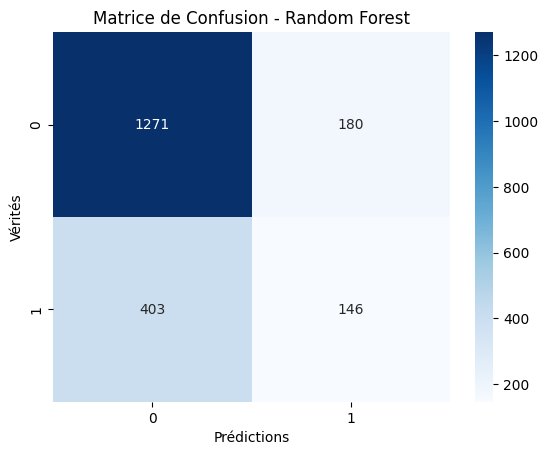

In [ ]:
# Matrice de confusion

conf_matrix = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Matrice de Confusion - Random Forest')
plt.xlabel('Prédictions')
plt.ylabel('Vérités')
plt.show()

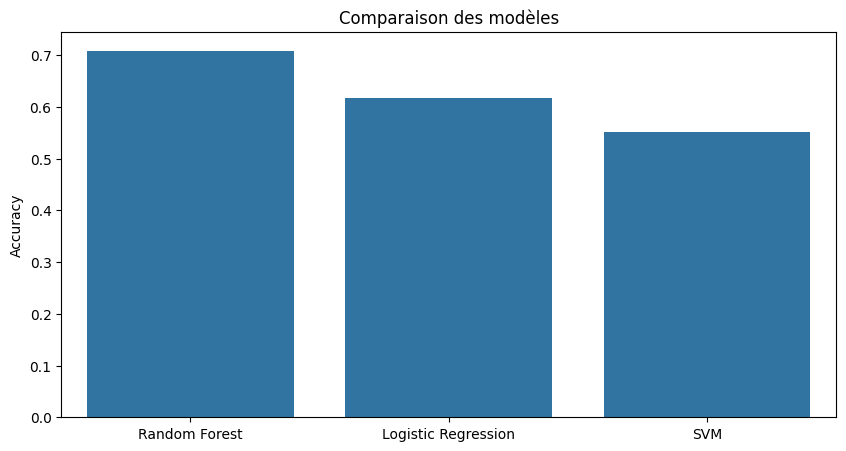

In [ ]:
# Comparaison des modèles sur l'accuracy
models = ['Random Forest', 'Logistic Regression', 'SVM']
accuracies = [accuracy_score(y_test, y_pred_rf),
              accuracy_score(y_test, y_pred_lr),
              accuracy_score(y_test, y_pred_svc)]

# Affichage de la comparaison
plt.figure(figsize=(10, 5))
sns.barplot(x=models, y=accuracies)
plt.title('Comparaison des modèles')
plt.ylabel('Accuracy')
plt.show()


# **Sauvegarder le modele **

In [ ]:
import joblib

# Sauvegarde du modèle
joblib.dump(model_rf, '/content/drive/MyDrive/Prédiction_Blessures/modele_tab/modele4_tab.h5')

# Pour le recharger plus tard :
loaded_model = joblib.load('/content/drive/MyDrive/Prédiction_Blessures/modele_tab/modele4_tab.h5')

# Test de prédiction avec le modèle chargé
# Use .iloc to access the first row of the DataFrame
sample_data = X_test.iloc[[0]].values.reshape(1, -1)
print(f"Prédiction sur un exemple : {loaded_model.predict(sample_data)}")

Prédiction sur un exemple : [1]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, roc_auc_score, f1_score

# Définir une liste de modèles à tester
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'SVM': SVC(probability=True, random_state=42),
    'KNN': KNeighborsClassifier(),
    'Random Forest': RandomForestClassifier(random_state=42),
    'Gradient Boosting': GradientBoostingClassifier(random_state=42),
    'XGBoost': XGBClassifier(random_state=42)
}

# Stocker les résultats pour comparer
results = {}

# Entraîner et évaluer chaque modèle
for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train_balanced, y_train_balanced)  # Entraîne le modèle

    # Prédictions
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None

    # Calculer les métriques
    f1 = f1_score(y_test, y_pred)
    auc = roc_auc_score(y_test, y_pred_proba) if y_pred_proba is not None else "N/A"
    report = classification_report(y_test, y_pred, output_dict=True)

    # Stocker les résultats
    results[name] = {
        'F1-Score': f1,
        'ROC-AUC': auc,
        'Classification Report': report
    }

    print(f"{name} - F1-Score: {f1:.4f}, ROC-AUC: {auc}")
    print(classification_report(y_test, y_pred))

# Afficher les performances globales
print("\nRésultats finaux :")
for model_name, metrics in results.items():
    print(f"{model_name}: F1-Score={metrics['F1-Score']:.4f}, ROC-AUC={metrics['ROC-AUC']}")

Training Logistic Regression...
Logistic Regression - F1-Score: 0.4747, ROC-AUC: 0.6712812845609899
              precision    recall  f1-score   support

           0       0.81      0.61      0.70      1451
           1       0.38      0.63      0.47       549

    accuracy                           0.62      2000
   macro avg       0.60      0.62      0.59      2000
weighted avg       0.70      0.62      0.64      2000

Training SVM...
SVM - F1-Score: 0.3941, ROC-AUC: 0.5683888631544856
              precision    recall  f1-score   support

           0       0.76      0.56      0.64      1451
           1       0.31      0.53      0.39       549

    accuracy                           0.55      2000
   macro avg       0.54      0.55      0.52      2000
weighted avg       0.64      0.55      0.57      2000

Training KNN...
KNN - F1-Score: 0.3841, ROC-AUC: 0.5623626190843825
              precision    recall  f1-score   support

           0       0.75      0.58      0.65      1451
 

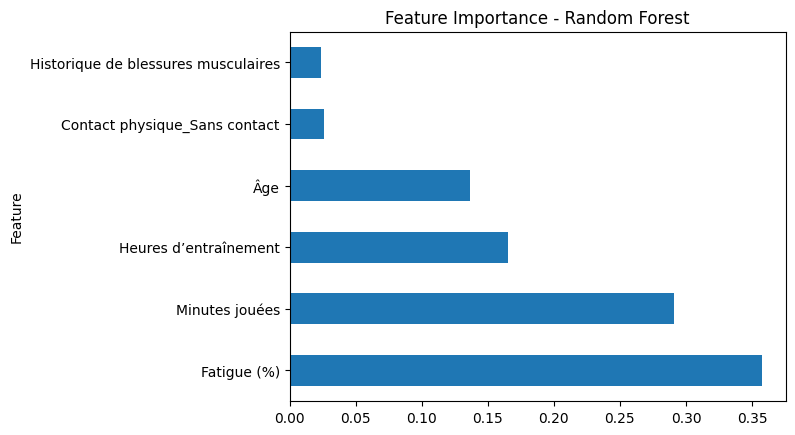

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Feature importance pour Random Forest
rf_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': model_rf.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Visualisation
rf_importances.plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title("Feature Importance - Random Forest")
plt.show()

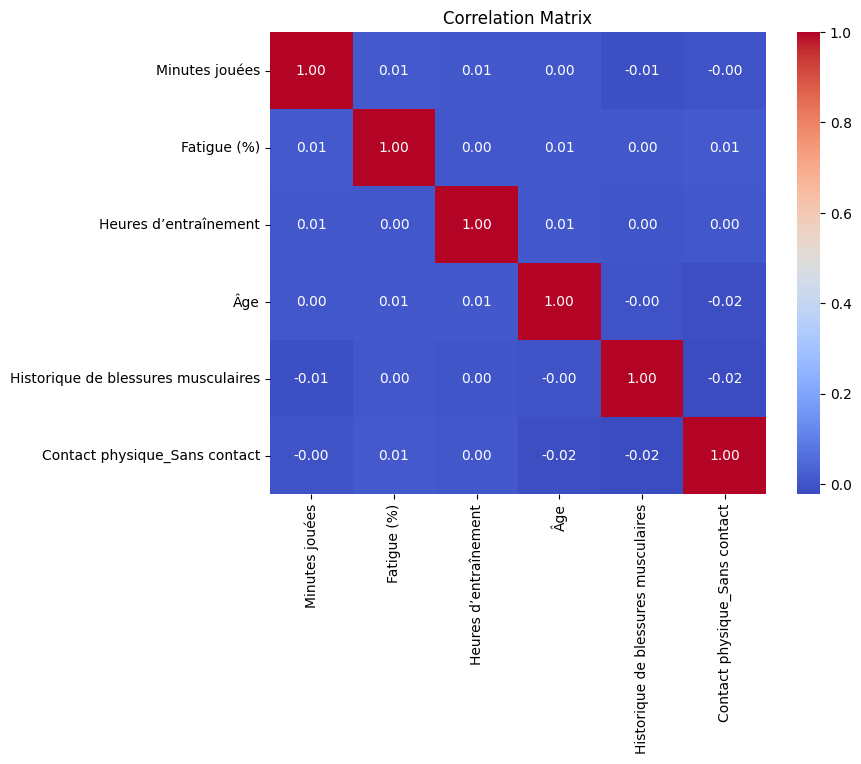

In [ ]:
import seaborn as sns

corr_matrix = X_train.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix")
plt.show()